# FAKE NEWS PREDICTION

Goal :->
Predict Fake news based on features like author and title.

Model: Logistic Regression, XGBClassifier

We'll include:

1. Data preprocessing (Stemping, Vectorizing, train-test split)
2. Training the model
3. Evaluation (Accuracy)
4. Visualizing the model
5. Prediction

About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article
5. label: a label that marks whether the news article is real or fake:

           1: Fake news
           0: real News

In [2]:
#Importing the Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

### Data Preprocessing

In [5]:
# loading the dataset
df = pd.read_csv('fake_news_dataset.csv')
df.head()

,title,text,author,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,Paula George,0
1,To offer down resource great point.,probably guess western behind likely next inve...,Joseph Hill,0
2,Himself church myself carry.,them identify forward present success risk sev...,Julia Robinson,0
3,You unit its should.,phone which item yard Republican safe where po...,Mr. David Foster DDS,1
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,Austin Walker,0


In [6]:
df.shape

(20000, 4)

In [7]:
# counting the number of missing values in the dataset
df.isnull().sum()

title        0
text         0
author    1000
label        0
dtype: int64

In [8]:
# Replacing the null values with empty string
df = df.fillna('')

In [9]:
# Merging the author and title columns
df['content'] = df['author'] + ' ' + df['title']

In [10]:
df.head()

,title,text,author,label,content
0,Foreign Democrat final.,more tax development both store agreement lawy...,Paula George,0,Paula George Foreign Democrat final.
1,To offer down resource great point.,probably guess western behind likely next inve...,Joseph Hill,0,Joseph Hill To offer down resource great point.
2,Himself church myself carry.,them identify forward present success risk sev...,Julia Robinson,0,Julia Robinson Himself church myself carry.
3,You unit its should.,phone which item yard Republican safe where po...,Mr. David Foster DDS,1,Mr. David Foster DDS You unit its should.
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,Austin Walker,0,Austin Walker Billion believe employee summer ...


Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [11]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    ps = PorterStemmer()
    stemmed_content = [ps.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
df['content'] = df['content'].apply(stemming)

In [13]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [14]:
print(X)
print(Y)

['paula georg foreign democrat final'
 'joseph hill offer resourc great point' 'julia robinson church carri' ...
 'kristen franklin yet exist experi unit' 'david wise school wide item'
 'jame peterson offer chair cover senior born']
[0 0 0 ... 1 0 0]


In [15]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 1607)	0.5384098017728571
  (0, 820)	0.47026673573260913
  (0, 760)	0.43033252154232826
  (0, 729)	0.3856311377999166
  (0, 553)	0.3937850036256744
  (1, 1761)	0.3994347584771229
  (1, 1650)	0.40644929622403225
  (1, 1544)	0.4059231913258755
  (1, 1106)	0.39395595700897607
  (1, 945)	0.4349807003583625
  (1, 855)	0.4075140492253222
  (2, 1802)	0.4798508920150325
  (2, 1116)	0.5803950203356232
  (2, 402)	0.46849498889312446
  (2, 340)	0.4619493340010572
  (3, 2168)	0.4621251552704844
  (3, 1474)	0.36176526198760245
  (3, 765)	0.5331103685464007
  (3, 535)	0.46879786583185773
  (3, 529)	0.3893432059572742
  (4, 2211)	0.40672886704516903
  (4, 2054)	0.3943487167650092
  (4, 655)	0.41121899358509134
  (4, 209)	0.39858312187055117
  (4, 182)	0.39333180511748317
  :	:
  (19996, 1677)	0.31677886528565996
  (19996, 1617)	0.338246234612171
  (19996, 1494)	0.3011404108931225
  (19996, 1349)	0.44657233844084904
  (19996, 1345)	0.3396980161532583
  (19996, 1316)	0.38290410625708515
  (19996, 

### Training the modal

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=42)

In [17]:
'''
if use this modal accuracy is 0.70 and 0.49
model = XGBClassifier()
model.fit(X_train, Y_train)
'''

'\nif use this modal accuracy is 0.70 and 0.49\nmodel = XGBClassifier()\nmodel.fit(X_train, Y_train)\n'

In [18]:
modal = LogisticRegression()
modal.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Model evaluation
# accuracy score on the training data
X_train_prediction = modal.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.644375


In [ ]:
# accuracy score on the test data
X_test_prediction = modal.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.488


### Visualization of the model

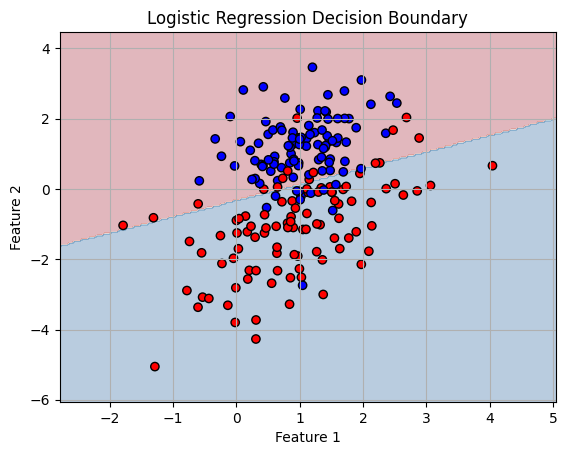

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate simple 2D data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=1, n_clusters_per_class=1)

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot everything
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.show()

### Predictive System

In [ ]:
Y_test[3]

1

In [ ]:
X_new = X_test[3]
prediction = modal.predict(X_new)

if (prediction[0]==0):
    print(prediction,'The news is Real News')
else:
    print(prediction,'The news is Fake News')

[1] The news is Fake News
